In [1]:

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df = df.dropna(subset = ['type','rating', 'duration','director', 'cast', 'country','date_added' ])

In [9]:
df['director'].isnull().sum()

0

In [10]:
df.shape

(5332, 12)

In [11]:
type_count = df['type'].value_counts()

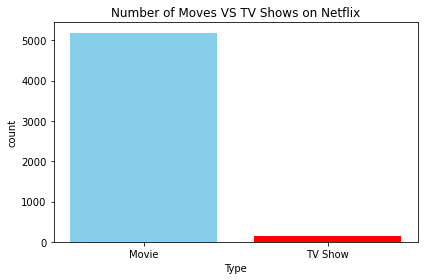

In [12]:
plt.figure(figsize = (6,4))
plt.bar(type_count.index, type_count.values, color=['skyblue', 'red'])
plt.xlabel('Type')
plt.ylabel('count')
plt.title('Number of Moves VS TV Shows on Netflix')
plt.tight_layout()
plt.savefig('movies_vs_tv_shows')
plt.show()


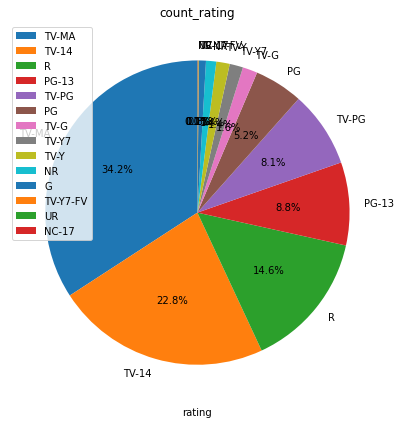

In [13]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize = (8,6))
plt.pie(rating_counts, labels = rating_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.xlabel('rating')
plt.title('count_rating')
plt.tight_layout()
plt.legend()
plt.savefig('rating')
plt.show()

In [14]:
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min', '', regex = False).astype(int)


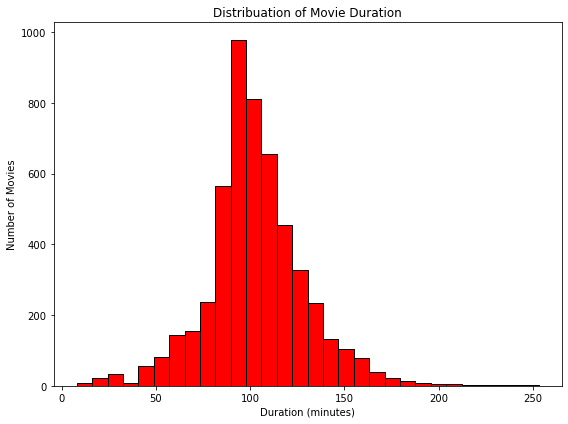

In [15]:
plt.figure(figsize = (8,6))
plt.hist(movie_df['duration_int'], bins = 30 , color = 'red', edgecolor = 'black')
plt.title('Distribuation of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('Movies_duration')
plt.show()

In [16]:
release_count = df['release_year'].value_counts().sort_index()

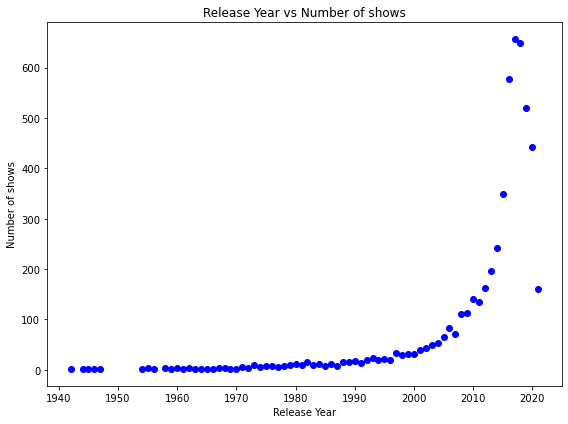

In [17]:
plt.figure(figsize = (8,6))
plt.scatter(release_count.index, release_count.values, color = 'blue' )
plt.title('Release Year vs Number of shows')
plt.xlabel('Release Year')
plt.ylabel('Number of shows')
plt.tight_layout()
plt.savefig('release.png')
plt.show()

In [18]:
country_counts = df['country'].value_counts().head(10)

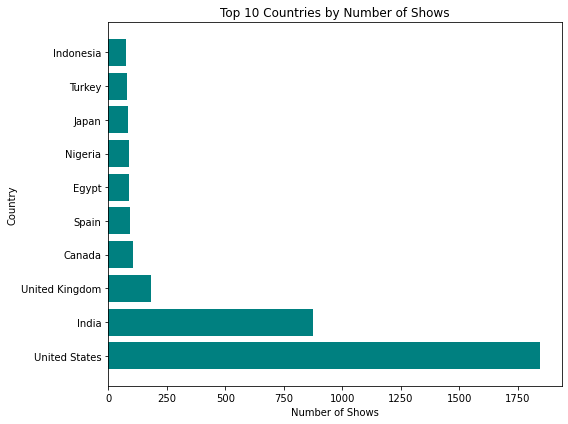

In [23]:
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color = 'teal')
plt.title('Top 10 Countries by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top1o.png')
plt.show()



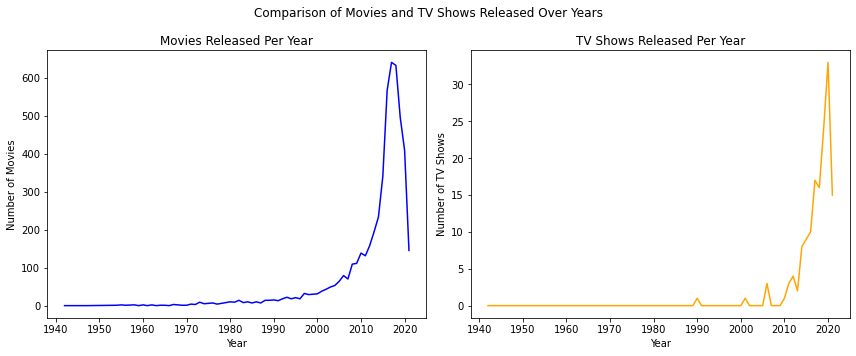

In [27]:
count_by_year = (df.groupby(['release_year', 'type']).size().unstack().fillna(0))

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Movies plot
ax[0].plot(count_by_year.index, count_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

# TV Shows plot
ax[1].plot(count_by_year.index, count_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

fig.suptitle('Comparison of Movies and TV Shows Released Over Years')

plt.tight_layout()
plt.show()
